MNIST podatkovni skup za izgradnju klasifikatora rukom pisanih znamenki
dostupan je u okviru Keras-a. Skripta zadatak_1.py ucitava MNIST podatkovni skup te podatke priprema za ucenje potpuno povezane mreže.

In [33]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras . models import load_model
from PIL import Image

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


Label 5


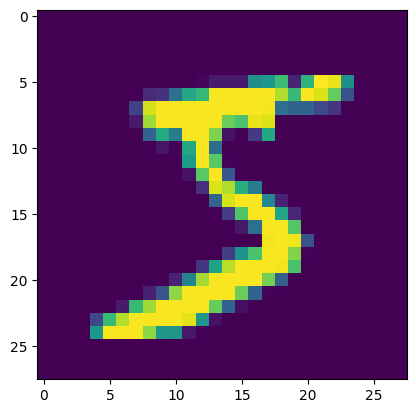

Label 0


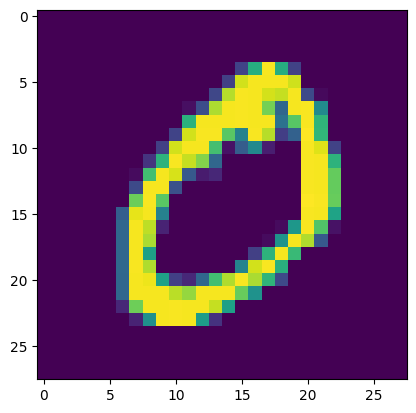

Label 4


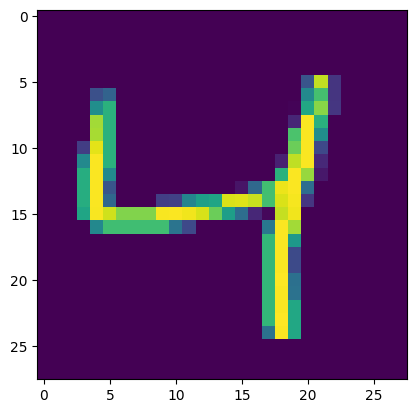

In [7]:
# TODO: prikazi nekoliko slika iz train skupa
for i in range(3):
    plt.figure()
    print(f'Label {y_train[i]}')
    plt.imshow(x_train[i])
    plt.show()

In [4]:
x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

# slike trebaju biti (28, 28, 1)
x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# pretvori labele
y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)

In [12]:
x_train_s = x_train_s.reshape(60000, 784)
x_test_s = x_test_s.reshape(10000, 784)

In [13]:
# TODO: kreiraj model pomocu keras.Sequential(); prikazi njegovu strukturu
model = keras.Sequential()
model.add(layers.Input(784,))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
# TODO: definiraj karakteristike procesa ucenja pomocu .compile()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# TODO: provedi ucenje mreze
batch_size = 32
epochs = 20
history = model.fit(x_train_s, y_train_s, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9203 - val_loss: 0.1195 - val_accuracy: 0.9678
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1179 - accuracy: 0.9639 - val_loss: 0.1072 - val_accuracy: 0.9692
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0834 - accuracy: 0.9739 - val_loss: 0.0946 - val_accuracy: 0.9737
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0640 - accuracy: 0.9796 - val_loss: 0.0874 - val_accuracy: 0.9765
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0496 - accuracy: 0.9837 - val_loss: 0.0827 - val_accuracy: 0.9762
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0818 - val_accuracy: 0.9785
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0339 - accuracy: 0.9890 - val_loss: 0.0918 - val_accuracy:

In [21]:
predictions = model.predict(x_test_s)
score = model.evaluate(x_test_s, y_test_s, verbose=0)
print(score)

313/313 [==============================] - 0s 1ms/step
[0.15267552435398102, 0.9729999899864197]


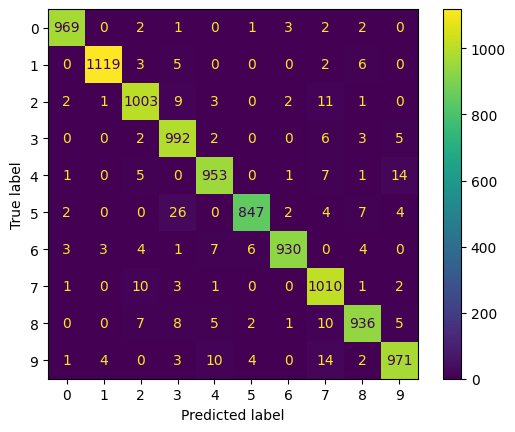

In [20]:
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test_s, axis=1)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [23]:
# TODO: spremi model
model.save('FCN/')

INFO:tensorflow:Assets written to: FCN/assets


INFO:tensorflow:Assets written to: FCN/assets


In [25]:
model = load_model('FCN/')

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [27]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255
x_train_s = x_train_s.reshape(60000, 784)
x_test_s = x_test_s.reshape(10000, 784)

In [30]:
y_pred = model.predict(x_test_s)
pred_labels = np.argmax(y_pred, axis=1)
wrong_labels = np.where(pred_labels != y_test)[0]

313/313 [==============================] - 1s 2ms/step
[  38  217  233  247  320  321  340  447  495  543  583  659  674  684
  691  720  844  882  900  947  951  956  992 1003 1014 1039 1050 1101
 1178 1181 1226 1232 1242 1247 1289 1319 1331 1393 1395 1466 1522 1527
 1530 1551 1553 1554 1584 1597 1609 1621 1641 1671 1681 1737 1790 1800
 1828 1850 1878 1901 1982 1984 2016 2035 2052 2053 2098 2109 2130 2135
 2162 2182 2185 2224 2325 2339 2369 2387 2395 2408 2414 2488 2582 2597
 2604 2607 2616 2635 2648 2654 2720 2769 2771 2810 2836 2863 2877 2901
 2921 2930 2939 2945 2956 2970 2975 2995 3005 3030 3060 3073 3117 3225
 3263 3289 3302 3369 3405 3414 3422 3503 3520 3533 3558 3564 3565 3567
 3599 3607 3618 3702 3727 3749 3767 3780 3808 3811 3853 3906 3950 3951
 3962 3985 4052 4065 4078 4140 4163 4176 4193 4201 4224 4248 4265 4271
 4289 4294 4306 4313 4314 4360 4370 4387 4425 4433 4497 4536 4547 4571
 4601 4723 4731 4740 4807 4823 4833 4860 4876 4880 4890 4956 4989 5201
 5450 5457 5634 5654 5

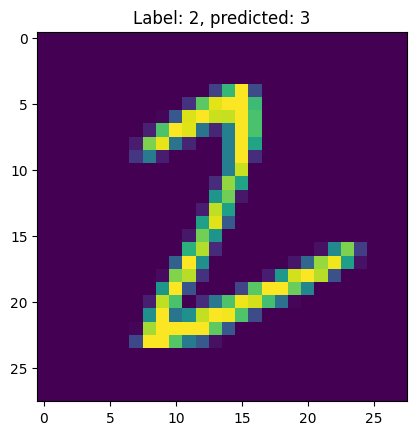

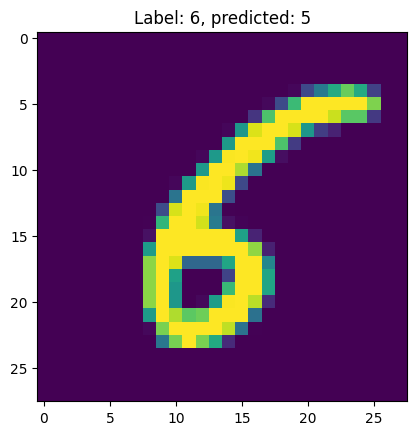

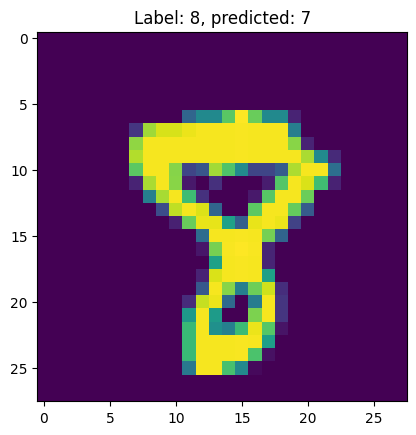

In [31]:
# Pomocu matplotlib biblioteke potrebno je prikazati nekoliko loše klasificiranih slika iz skupa podataka za testiranje. Pri tome u naslov slike napišite stvarnu oznaku i oznaku predvidenu mrežom
for i in range(3):
    plt.figure()
    index = wrong_labels[i]
    plt.imshow(x_test[index])
    plt.title(f'Label: {y_test[index]}, predicted: {pred_labels[index]}')


1/1 [==============================] - 0s 47ms/step
[[7.2399857e-08 7.4779314e-01 7.9290010e-03 2.5103401e-02 5.5891808e-02
  1.1508408e-04 5.1909523e-05 1.5098979e-01 1.2008052e-02 1.1783581e-04]]


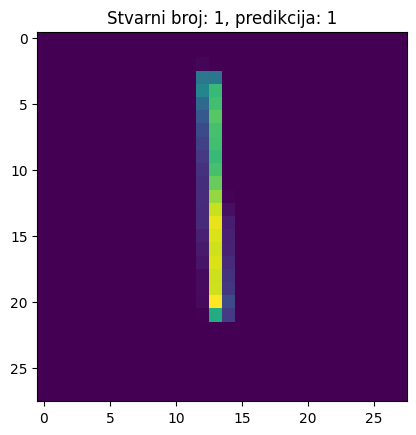

In [57]:
model = load_model('FCN/')


image = Image.open("test.png")
image = image.convert("L")
image = image.resize((28, 28))

image_array = np.array(image)
image_array = image_array.reshape(1, 784)
image_array = image_array.astype("float32") / 255

predictions = model.predict(image_array)
print(predictions)
predicted_class = np.argmax(predictions, axis=1)


plt.imshow(image)
plt.title(f'Stvarni broj: 1, predikcija: {predicted_class[0]}')
plt.show()